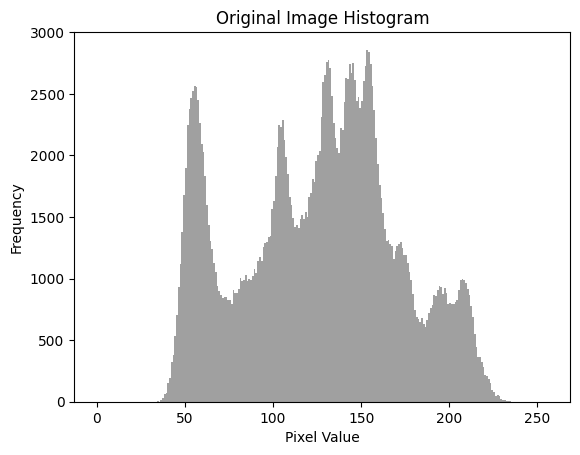

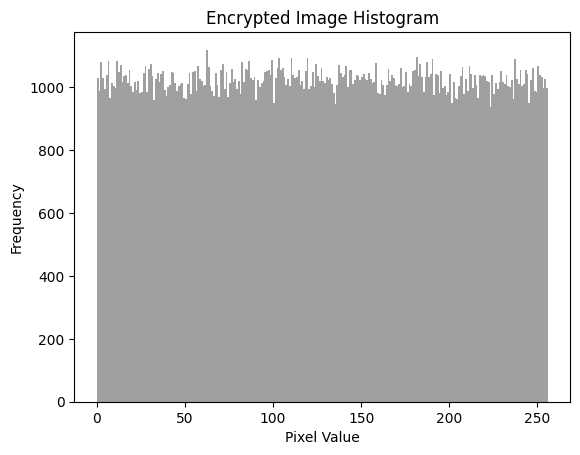

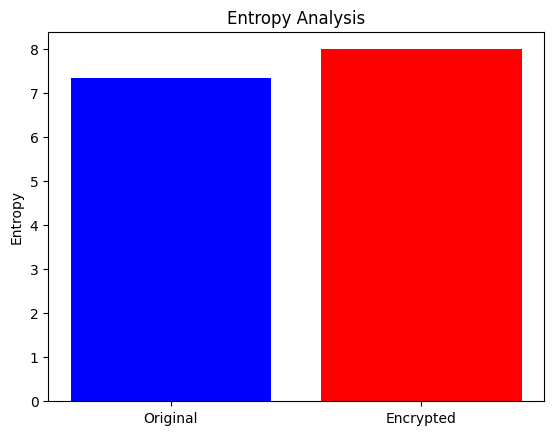

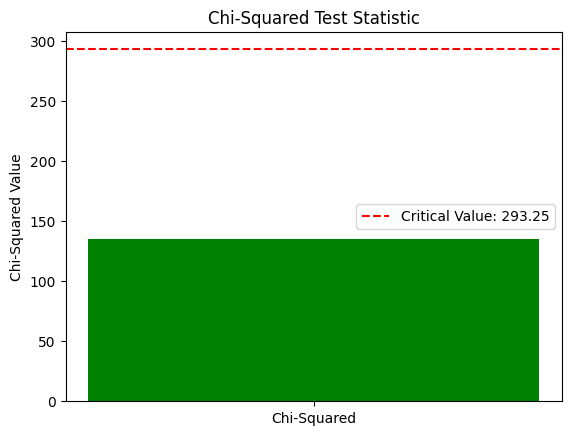

Chi-Squared Statistic: 135.36
P-Value: 1.0000
Chi-Squared Critical Value (0.05 significance level): 293.25
Original Image Correlation - Vertical: 0.9862
Original Image Correlation - Horizontal: 0.9741
Original Image Correlation - Diagonal: 0.9619
Encrypted Image Correlation - Vertical: -0.0005
Encrypted Image Correlation - Horizontal: 0.0081
Encrypted Image Correlation - Diagonal: 0.0020


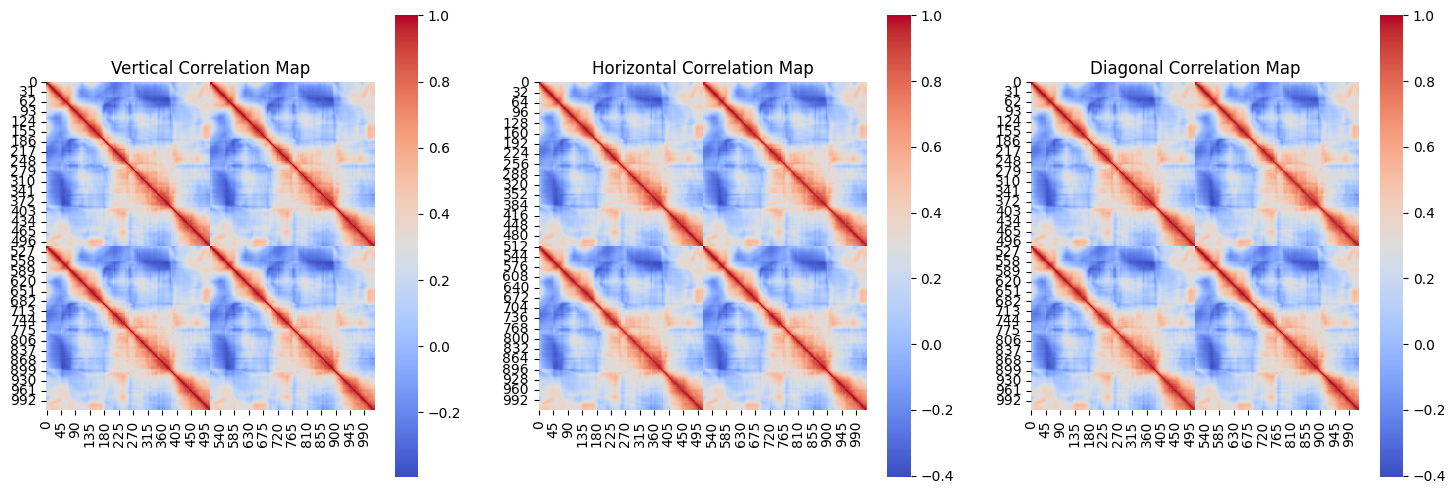

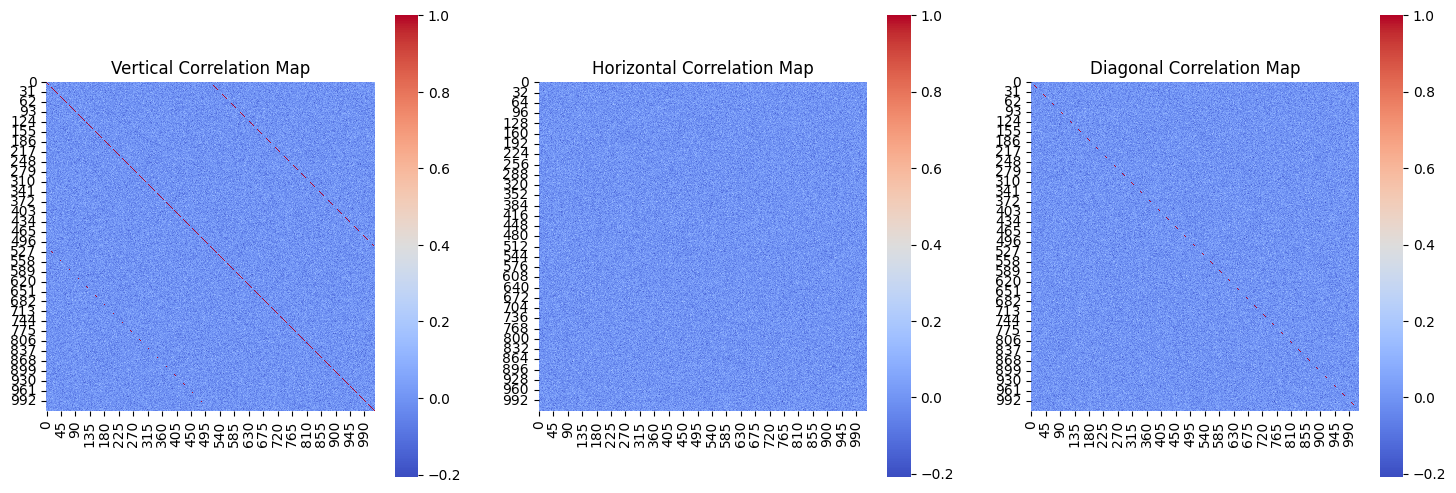

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy, chi2_contingency, chi2
from scipy.stats import pearsonr

def load_image(image_path):
    """Loads a grayscale BMP image."""
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def plot_histogram(image, title="Histogram"):
    """Plots the histogram of an image."""
    plt.figure()
    plt.hist(image.ravel(), bins=256, range=(0, 256), density=True, color='gray', alpha=0.75)
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show(block=True)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy, chi2, chi2_contingency, pearsonr
import cv2

def load_image(image_path):
    """Loads a grayscale image as a NumPy array."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return np.array(image, dtype=np.uint8)

def correlation_analysis(image):
    """Computes Pearson correlation coefficients for vertical, horizontal, and diagonal adjacent pixels."""
    rows, cols = image.shape
    x_v, y_v = image[:-1, :].ravel(), image[1:, :].ravel()  # Vertical
    x_h, y_h = image[:, :-1].ravel(), image[:, 1:].ravel()  # Horizontal
    x_d, y_d = image[:-1, :-1].ravel(), image[1:, 1:].ravel()  # Diagonal

    corr_v, _ = pearsonr(x_v, y_v)
    corr_h, _ = pearsonr(x_h, y_h)
    corr_d, _ = pearsonr(x_d, y_d)

    return corr_v, corr_h, corr_d

def correlation_map(image, title="Correlation Heatmap"):
    """Generates a correlation heatmap for vertical, horizontal, and diagonal directions."""
    corr_matrix_v = np.corrcoef(image[:-1, :].astype(float), image[1:, :].astype(float))
    corr_matrix_h = np.corrcoef(image[:, :-1].astype(float), image[:, 1:].astype(float))
    corr_matrix_d = np.corrcoef(image[:-1, :-1].astype(float), image[1:, 1:].astype(float))

    plt.figure(figsize=(18, 6))
    for i, (matrix, direction) in enumerate(zip([corr_matrix_v, corr_matrix_h, corr_matrix_d], ["Vertical", "Horizontal", "Diagonal"])):
        plt.subplot(1, 3, i+1)
        sns.heatmap(matrix, cmap='coolwarm', square=True)
        plt.title(f"{direction} Correlation Map")
    plt.show()

def calculate_entropy(image):
    """Computes the entropy of an image."""
    hist, _ = np.histogram(image, bins=256, range=(0, 256), density=True)
    return entropy(hist, base=2)

def chi_squared_test(image):
    """Performs a chi-squared uniformity test and compares with critical value."""
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    expected = np.ones(256) * np.sum(hist) / 256  # Expected uniform distribution
    chi2_stat, p_value = chi2_contingency([hist, expected])[:2]
    critical_value = chi2.ppf(0.95, df=255)  # Degrees of freedom = 255

    return chi2_stat, p_value, critical_value

def plot_histogram(image, title):
    """Plots the histogram of an image."""
    plt.figure()
    plt.hist(image.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.75)
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()

def analyze_images(original_path, encrypted_path):
    """Performs histogram, correlation, entropy, and chi-squared analysis on images."""
    original = load_image(original_path)
    encrypted = load_image(encrypted_path)

    plot_histogram(original, "Original Image Histogram")
    plot_histogram(encrypted, "Encrypted Image Histogram")

    correlation_original = correlation_analysis(original)
    correlation_encrypted = correlation_analysis(encrypted)
    entropy_values = [calculate_entropy(original), calculate_entropy(encrypted)]
    chi2_values = chi_squared_test(encrypted)

    labels = ["Original", "Encrypted"]

    plt.figure()
    plt.bar(labels, entropy_values, color=['blue', 'red'])
    plt.title("Entropy Analysis")
    plt.ylabel("Entropy")
    plt.show()

    plt.figure()
    plt.bar(["Chi-Squared"], [chi2_values[0]], color='green')
    plt.axhline(y=chi2_values[2], color='r', linestyle='--', label=f'Critical Value: {chi2_values[2]:.2f}')
    plt.title("Chi-Squared Test Statistic")
    plt.ylabel("Chi-Squared Value")
    plt.legend()
    plt.show()

    print(f"Chi-Squared Statistic: {chi2_values[0]:.2f}")
    print(f"P-Value: {chi2_values[1]:.4f}")
    print(f"Chi-Squared Critical Value (0.05 significance level): {chi2_values[2]:.2f}")

    print(f"Original Image Correlation - Vertical: {correlation_original[0]:.4f}")
    print(f"Original Image Correlation - Horizontal: {correlation_original[1]:.4f}")
    print(f"Original Image Correlation - Diagonal: {correlation_original[2]:.4f}")
    print(f"Encrypted Image Correlation - Vertical: {correlation_encrypted[0]:.4f}")
    print(f"Encrypted Image Correlation - Horizontal: {correlation_encrypted[1]:.4f}")
    print(f"Encrypted Image Correlation - Diagonal: {correlation_encrypted[2]:.4f}")

    correlation_map(original, "Original Image Correlation Maps")
    correlation_map(encrypted, "Encrypted Image Correlation Maps")

analyze_images("lena_gray.bmp", "encrypted_image_new.bmp")
